In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Import the dataset
df = pd.read_csv("diabetes.csv")
df.head(9)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0


In [3]:
# Define variable X
X = df.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]].values
X[0:8]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087],
       [-0.09269548, -0.04464164, -0.04069594, -0.01944183, -0.06899065,
        -0.07928784,  0.04127682, -0.0763945 , -0.04117617, -0.09634616],
       [-0.04547248,  0.05068012, -0.04716281, -0.01599898, -0.04009564,
        -0.02480001,  0.00077881, -0.03949338

In [5]:
# Define variable y. Reshape X and y
y = df.iloc[:,10].values
y = y.reshape(-1, 1)
X = X.reshape(-1, X.shape[1])

In [7]:
# Create an empty linear regression model
diabetes_model = LinearRegression()

In [8]:
# Create the model using fit(X,y)
diabetes_model.fit(X,y)

LinearRegression()

In [9]:
# Training and test samples

# Split data into training and test sets
rseed = 23
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,  random_state=rseed)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (353, 10) (353, 1)
Test data: (89, 10) (89, 1)


In [10]:
# Predict the progression values on the test set
y_pred = diabetes_model.predict(X_test)

In [11]:
# R squared score
print ("The R2 Score is:", round (diabetes_model.score(X_test, y_test), 2))

The R2 Score is: 0.47


An R-squared value of 0.47 shows a medium/low level of correlation. It means that the model explains 47 percent of the variation in the dependent variable. 

Text(0.5, 1.0, 'Residuals of Predictions')

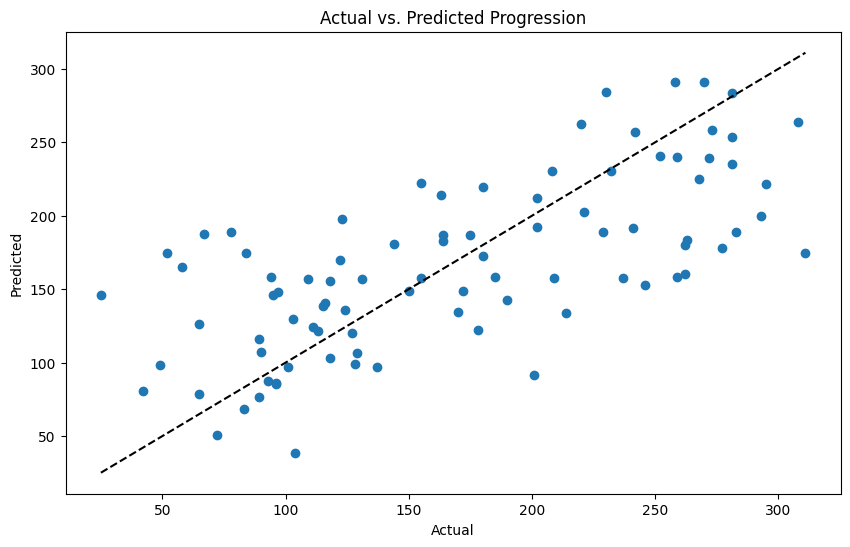

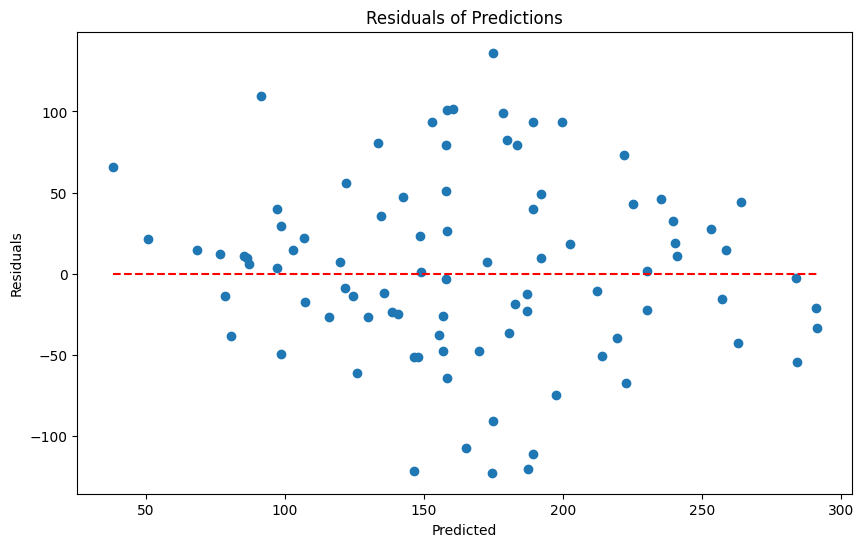

In [12]:
# Predict the progression values on the test set
y_pred = diabetes_model.predict(X_test)

# Plotting the actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Progression')

# Plot the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')

In [16]:
# Normalise the data using MinMaxScaler

# Fit the scaler on data to train
scaler_1 = MinMaxScaler()
scaler_1.fit(X_train)

# Apply the scaler on the train and test data
X_train = scaler_1.transform(X_train)
X_test = scaler_1.transform(X_test)

In [17]:
# Predict the progression values on the test set
y_pred = diabetes_model.predict(X_test)

In [22]:
# Print the R-squared score
print ("The R2 Score is:", round (diabetes_model.score(X_test, y_test), 2))

The R2 Score is: -59.43


A negative R-squared value shows a negative correlation. A negative correlation describes the extent to which two variables move in opposite directions. -59.43 shows a medium/high negative correlation between variables.

Text(0.5, 1.0, 'Residuals of Predictions')

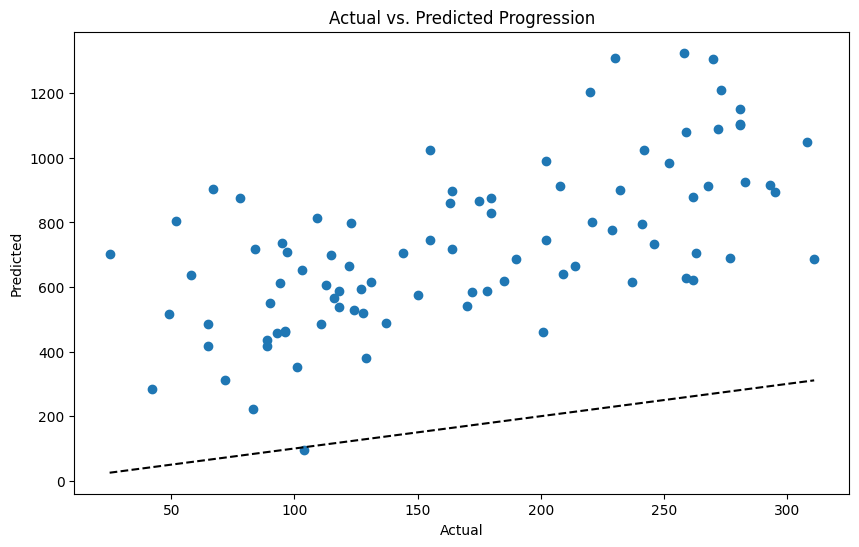

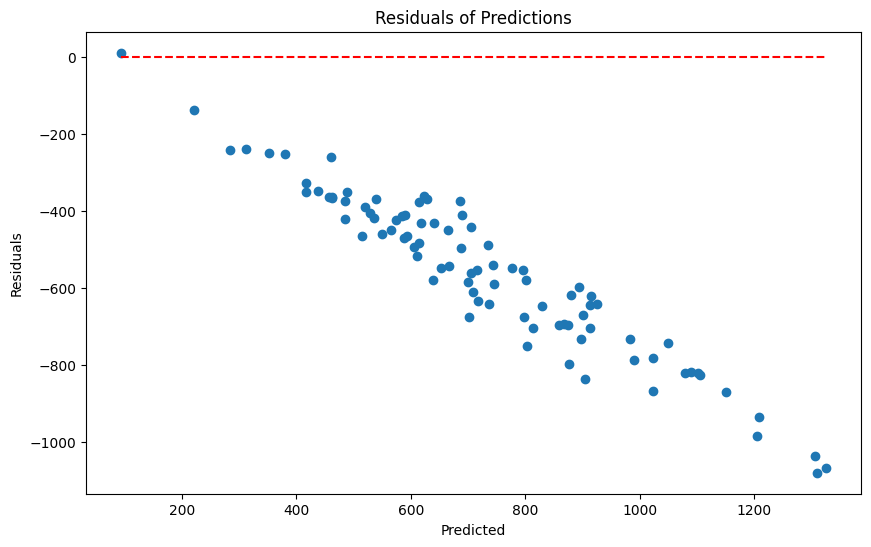

In [23]:
# Predict the progression values on the test set
y_pred = diabetes_model.predict(X_test)

# Plotting the actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Progression')

# Plot the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')

In [24]:
# Fit the model
linear_model_1 = LinearRegression()
model = linear_model_1.fit(X_train, y_train)
predictions = linear_model_1.predict(X_test)

# Create line coordinates
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = linear_model_1.predict(X_line)

print('Intercept: \n', linear_model_1.intercept_)
print('Coefficients: \n', linear_model_1.coef_)

Intercept: 
 [0.2631382]
Coefficients: 
 [[  -4.325416    -25.87489936  130.23755571   79.72225993 -281.78073485
   169.4272368    62.57500688   61.16459841  195.21322347   20.61117695]]


In [25]:
# Check the predictions
predictions[0:8]

array([[290.8985031 ],
       [132.81832981],
       [140.44601181],
       [ 30.52576133],
       [200.92486072],
       [198.95481117],
       [196.91371478],
       [147.93181701]])

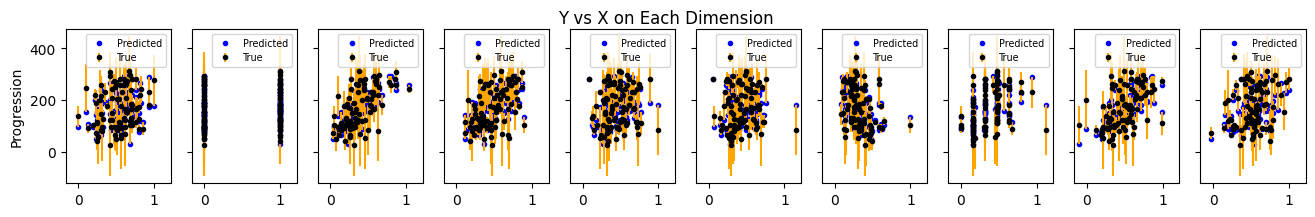

In [26]:
# Plot the errors
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(16,2))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel(df.columns[10])

# Get values for the error bar
err_bar_val = np.abs((y_test-predictions)[:,0])

# Plot data, predicted values, and error bars
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=err_bar_val, fmt='.k', ecolor='orange', label='True')
    ax[i].scatter(X_test[:,i], predictions[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

In [27]:
# Print intercept and coefficients
print('Intercept: \n', diabetes_model.intercept_)
print('Coefficients: \n', diabetes_model.coef_)

Intercept: 
 [152.13348416]
Coefficients: 
 [[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
   476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]]


In [28]:
# Scaling the data using StandarScaler

# Fitting the scaler on the data to train
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)

# Applying the scaler on the train and test data
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [29]:
# Predict the progression values on the test set
y_pred = diabetes_model.predict(X_test)

In [30]:
# Print the R-squared score
print ("The R2 Score is:", round (model.score(X_test, y_test), 2))

The R2 Score is: -10.93


A negative correlation value of -10.93 shows a very low negative correlation between variables.

Text(0.5, 1.0, 'Residuals of Predictions')

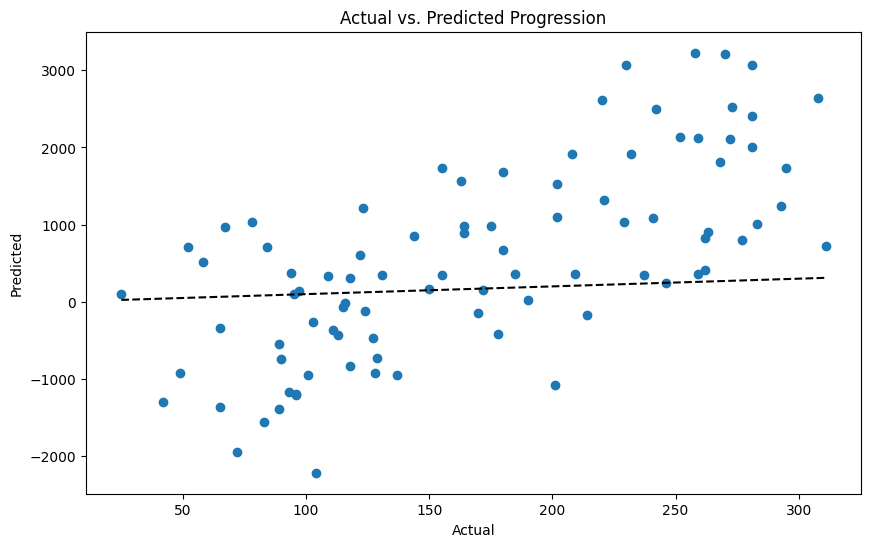

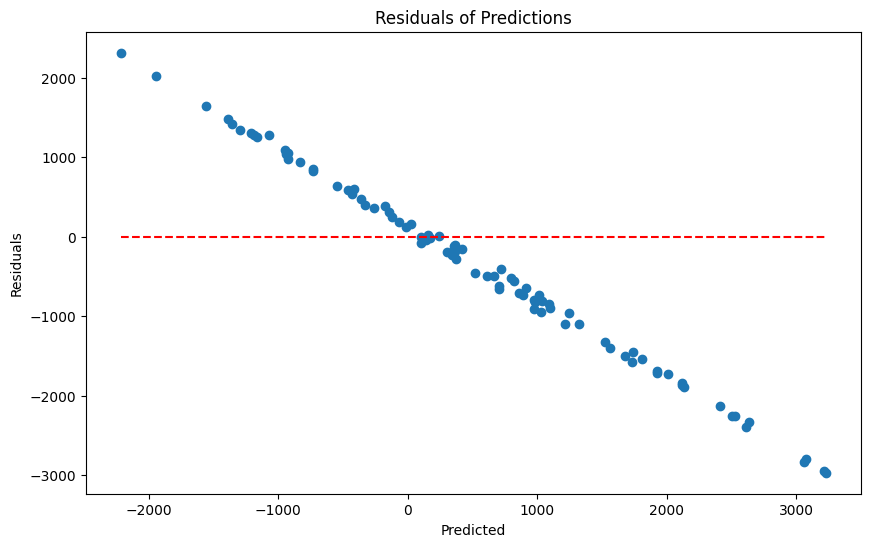

In [31]:
# Predict the progression values on the test set
y_pred = diabetes_model.predict(X_test)

# Plotting the actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Progression')

# Plot the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')

In [32]:
# Fitting the model on the training data
linear_model_2 = LinearRegression()
model = linear_model_2.fit(X_train, y_train)
predictions = linear_model_2.predict(X_test)

# Creating line coordinates
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = linear_model_2.predict(X_line)

print('Intercept: \n', linear_model_2.intercept_)
print('Coefficients: \n', linear_model_2.coef_)

Intercept: 
 [147.78470255]
Coefficients: 
 [[ -0.95567861 -12.89955019  24.0062771   15.36227276 -47.12832261
   29.63772795  10.58261516  12.38396033  38.62646575   3.59889203]]


In [34]:
# Check the predictions
predictions[0:8]

array([[290.8985031 ],
       [132.81832981],
       [140.44601181],
       [ 30.52576133],
       [200.92486072],
       [198.95481117],
       [196.91371478],
       [147.93181701]])

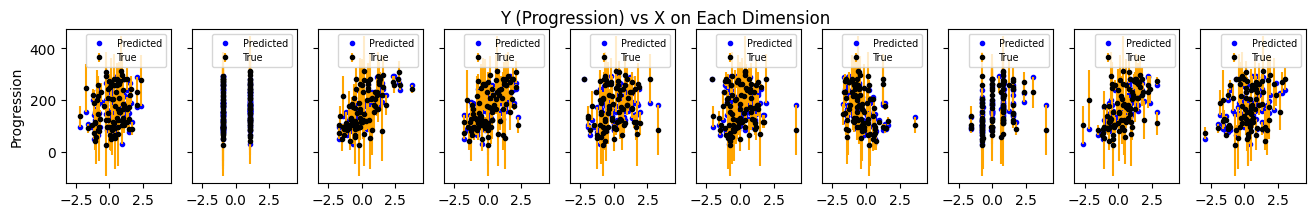

In [36]:
# Plot the errors
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(16,2))
fig.suptitle("Y (Progression) vs X on Each Dimension")
ax[0].set_ylabel(df.columns[10])

# Get values for the error bar
err_bar_val = np.abs((y_test-predictions)[:,0])

# Plot data, predicted values, and error bars
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=err_bar_val, fmt='.k', ecolor='orange', label='True')
    ax[i].scatter(X_test[:,i], predictions[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

In [37]:
# Print the intercept and coefficients
print('Intercept: \n', diabetes_model.intercept_)
print('Coefficients: \n', diabetes_model.coef_)

Intercept: 
 [152.13348416]
Coefficients: 
 [[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
   476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]]
